In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Load the dataset with the correct encoding
file_path = 'Cricket.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the column names
print(df.columns)

Index(['Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR',
       '100', '50', '0'],
      dtype='object')


In [40]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [41]:
df.shape

(79, 13)

In [42]:
(df.isnull().sum() * 100 / len(df)).value_counts(ascending=False)

0.0    13
Name: count, dtype: int64

In [43]:
df.isnull().sum().value_counts(ascending=False)

0    13
Name: count, dtype: int64

In [44]:
(df.isnull().sum(axis=1) * 100 / len(df)).value_counts(ascending=False)

0.0    79
Name: count, dtype: int64

In [45]:
df.isnull().sum(axis=1).value_counts(ascending=False)

0    79
Name: count, dtype: int64

In [46]:
df[['Strt','End']] = df.Span.str.split("-",expand=True)

In [47]:
df[['Strt','End']]=df[['Strt','End']].astype(int)
df['Exp']=df['End']-df['Strt']
df=df.drop(['Strt','End','Span'], axis = 1)
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


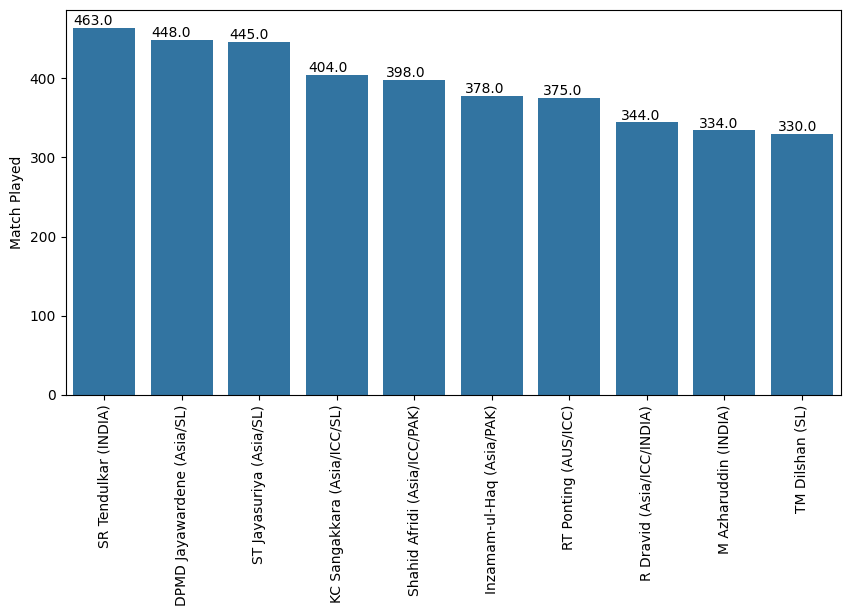

In [48]:
plt.figure(figsize = (10,5))
mat_top10 = df[['Player','Mat']].sort_values('Mat', ascending = False).head(10)
ax = sns.barplot(x='Player', y='Mat', data= mat_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Match Played')
plt.xticks(rotation=90)
plt.show()

<ipython-input-49-68bc45f4e4f3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Player', y='Inns', data=inns, palette='viridis')


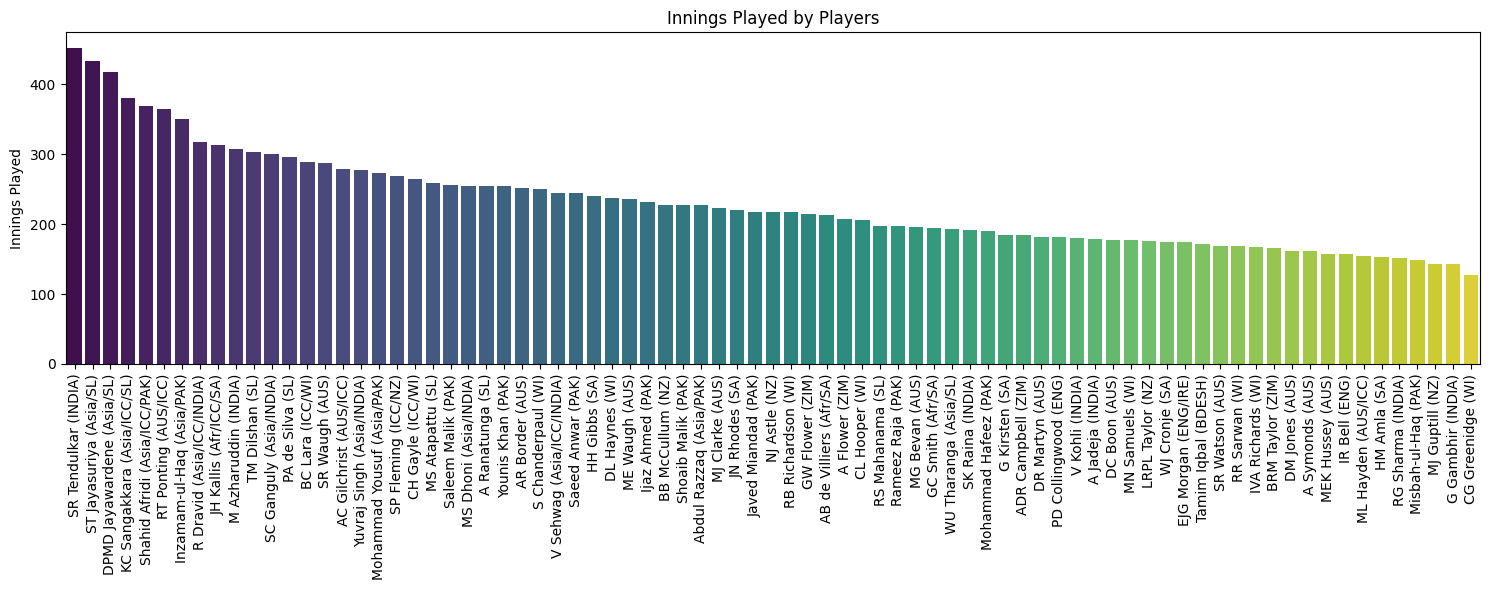

In [49]:

plt.figure(figsize=(15, 6))
ax = sns.barplot(x='Player', y='Inns', data=inns, palette='viridis')
ax.set(xlabel='', ylabel='Innings Played')
plt.xticks(rotation=90)
plt.title('Innings Played by Players')
plt.tight_layout()
plt.show()